In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#選擇要預測的圖片的來源

download image

In [3]:
import urllib.request
import os
img_url="https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
img_name = os.path.basename(img_url)
urllib.request.urlretrieve(img_url,img_name)

('Golde33443.jpg', <http.client.HTTPMessage at 0x7f2fb23cc790>)

In [4]:
ls -l

total 212
-rw-r--r-- 1 root root 212652 May 30 05:06 Golde33443.jpg
drwxr-xr-x 1 root root   4096 May 17 13:39 sample_data/


#預處理圖片

查看照片

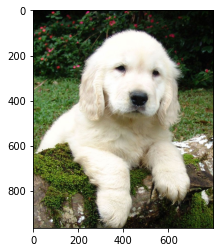

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(img_name)
imgplot = plt.imshow(img)
plt.show()

轉換為32x32

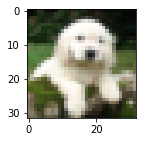

In [6]:
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height),Image.BILINEAR)
plt.figure(figsize=(2,2))
imgplot = plt.imshow(img)

In [7]:
from tensorflow.keras.preprocessing import image

In [8]:
x_img = image.img_to_array(img)
x_img.shape 

(32, 32, 3)

In [9]:
import numpy as np 

In [10]:
x_img_4d = np.expand_dims(x_img,axis=0)
x_img_4d.shape 

(1, 32, 32, 3)

normalize

In [11]:
x_img_4d[0][0][0]

array([6., 6., 4.], dtype=float32)

In [12]:
x_img_4d_normalize = np.array(x_img_4d) / 255 

In [13]:
x_img_4d_normalize[0][0][0]

array([0.02352941, 0.02352941, 0.01568628], dtype=float32)

連接 gdrive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#複製雲端硬碟模型目錄至虛擬主機

In [15]:
!mkdir -p Model/CifarCNN/

In [16]:
ls -l Model 

total 4
drwxr-xr-x 2 root root 4096 May 30 05:07 CifarCNN/


In [17]:
!cp -r  drive/MyDrive/Model/CifarCNN/  Model/

In [18]:
ls -l Model/CifarCNN/

total 8596
drwx------ 4 root root    4096 May 30 05:07 SavedModel/
-rw------- 1 root root    3415 May 30 05:07 structure.json
-rw------- 1 root root 2202904 May 30 05:07 weight.h5
-rw------- 1 root root 6588096 May 30 05:07 whole.h5


#載入模型

In [19]:
from tensorflow.keras.models import load_model

In [20]:
#load model structure
path="Model/CifarCNN/"
structure_filename="structure.json"
with open(path+structure_filename) as json_file:
  json_config = json_file.read()
loaded_model = tf.keras.models.model_from_json(json_config)   
print("Loaded structure from："+path+structure_filename)   
#load model weight
weight_filename="weight.h5"
loaded_model.load_weights(path+weight_filename) 
print("Loaded weight from："+path+weight_filename)  

Loaded structure from：Model/CifarCNN/structure.json
Loaded weight from：Model/CifarCNN/weight.h5


In [21]:
loaded_model.summary()

Model: "CifarCNNFunc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)             

#輸入預處理後的影像進行預測

In [22]:
probability=loaded_model.predict(x_img_4d_normalize) 

In [23]:
probability

array([[2.6681062e-05, 5.1259329e-05, 1.1102647e-02, 1.4993177e-03,
        7.4301322e-05, 9.8482841e-01, 4.3015432e-04, 1.6106092e-03,
        4.8098559e-07, 3.7602778e-04]], dtype=float32)

In [24]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [25]:
prediction

array([5])

In [26]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

#顯示預測結果

In [27]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

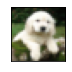

predict: dog
airplane   Probability:0.000026681
automobile Probability:0.000051259
bird       Probability:0.011102647
cat        Probability:0.001499318
deer       Probability:0.000074301
dog        Probability:0.984828413
frog       Probability:0.000430154
horse      Probability:0.001610609
ship       Probability:0.000000481
truck      Probability:0.000376028


In [28]:
show_predicted_probability(x_img_4d_normalize,[],prediction,probability,0)